# WeatherPy - Runser

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # added holders for other criteria, otherwise I just get a chart of the 1st data found
    
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
baseURL = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cityQRYurl = f"{baseURL}appid={weather_api_key}&units=imperial&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(cityQRYurl).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
                
       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ascension
Processing Record 2 of Set 1 | nyrob
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | mahina
Processing Record 5 of Set 1 | gilgit
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | palamos
Processing Record 12 of Set 1 | cururupu
Processing Record 13 of Set 1 | howrah
Processing Record 14 of Set 1 | san juan
Processing Record 15 of Set 1 | walvis bay
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 | bafoulabe
Processing Record 23

Processing Record 43 of Set 4 | kingston
Processing Record 44 of Set 4 | hermanus
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | williams lake
Processing Record 48 of Set 4 | mpika
Processing Record 49 of Set 4 | san andres
Processing Record 0 of Set 5 | bilibino
Processing Record 1 of Set 5 | barceloneta
Processing Record 2 of Set 5 | lukuledi
Processing Record 3 of Set 5 | kerikeri
Processing Record 4 of Set 5 | bardai
Processing Record 5 of Set 5 | timaru
Processing Record 6 of Set 5 | kupang
Processing Record 7 of Set 5 | 'ibri
City not found. Skipping...
Processing Record 8 of Set 5 | lihue
Processing Record 9 of Set 5 | mukah
City not found. Skipping...
Processing Record 10 of Set 5 | cognac
Processing Record 11 of Set 5 | flying fish cove
Processing Record 12 of Set 5 | nyurba
Processing Record 13 of Set 5 | muzayri'
City not found. Skipping...
Processing Record 14 of Set 5 | invercargill
Processing Record 15 of

Processing Record 36 of Set 8 | uturoa
Processing Record 37 of Set 8 | puerto rico
Processing Record 38 of Set 8 | midvagur
Processing Record 39 of Set 8 | kuching
Processing Record 40 of Set 8 | moab
Processing Record 41 of Set 8 | bodri
Processing Record 42 of Set 8 | awjilah
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | kattivakkam
Processing Record 45 of Set 8 | tadine
Processing Record 46 of Set 8 | iwon-up
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | bengkulu
Processing Record 49 of Set 8 | san clemente del tuyu
Processing Record 0 of Set 9 | vernon
Processing Record 1 of Set 9 | egilsstadir
Processing Record 2 of Set 9 | queenstown
Processing Record 3 of Set 9 | asikkala
Processing Record 4 of Set 9 | nemuro
Processing Record 5 of Set 9 | afaahiti
Processing Record 6 of Set 9 | antofagasta
Processing Record 7 of Set 9 | mogocha
Processing Record 8 of Set 9 | coahuayana de hidalgo
Processing Record 9 of Set 9 | belmonte
P

Processing Record 26 of Set 12 | kavaratti
Processing Record 27 of Set 12 | san-pedro
Processing Record 28 of Set 12 | rio tuba
Processing Record 29 of Set 12 | yanykurgan
Processing Record 30 of Set 12 | wanxian
Processing Record 31 of Set 12 | kalabo
Processing Record 32 of Set 12 | crieff
Processing Record 33 of Set 12 | acajutla
Processing Record 34 of Set 12 | namtsy
Processing Record 35 of Set 12 | bandar
Processing Record 36 of Set 12 | merritt
Processing Record 37 of Set 12 | homeland park
Processing Record 38 of Set 12 | laojunmiao
Processing Record 39 of Set 12 | pospelikha
Processing Record 40 of Set 12 | pundong
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
# create a data frame from cities, lat, and temp
city_data_DF = pd.DataFrame(city_data)

# Show Record Count
city_data_DF.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ascension,30.2169,-90.9001,69.01,96,100,0.00,US,1698671457
1,nyrob,60.7330,56.7202,24.37,95,100,4.65,RU,1698671457
2,sitka,57.0531,-135.3300,48.09,71,100,11.50,US,1698671457
3,mahina,-17.5065,-149.4890,74.97,83,20,6.91,PF,1698671458
4,gilgit,35.9221,74.3087,62.29,36,0,2.86,PK,1698671458


In [6]:
# Export the City_Data into a csv
city_data_DF.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_DF = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ascension,30.2169,-90.9001,69.01,96,100,0.00,US,1698671457
1,nyrob,60.7330,56.7202,24.37,95,100,4.65,RU,1698671457
2,sitka,57.0531,-135.3300,48.09,71,100,11.50,US,1698671457
3,mahina,-17.5065,-149.4890,74.97,83,20,6.91,PF,1698671458
4,gilgit,35.9221,74.3087,62.29,36,0,2.86,PK,1698671458


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

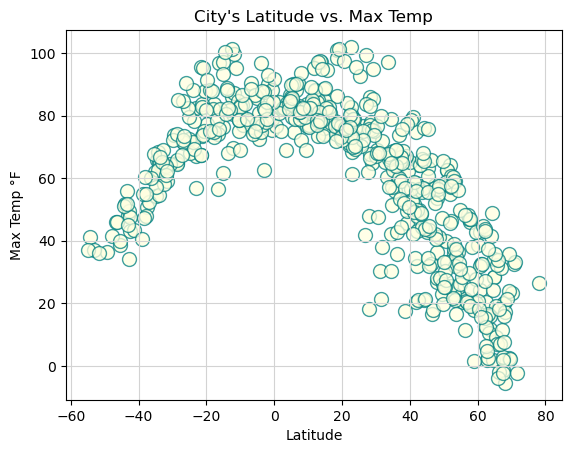

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_DF["Lat"], city_data_DF["Max Temp"], marker="o", facecolors="lightyellow", edgecolors="teal", s=100, alpha=0.75)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Max Temp °F")

plt.title("City's Latitude vs. Max Temp")

plt.grid (which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

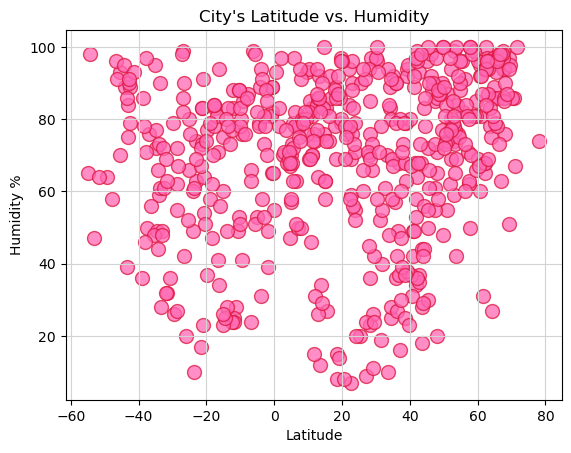

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_DF["Lat"], city_data_DF["Humidity"], marker="o", facecolors="hotpink", edgecolors="crimson", s=100, alpha=0.75)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.title("City's Latitude vs. Humidity")

plt.grid (which="major", axis="both", linestyle="-", color="lightgrey")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

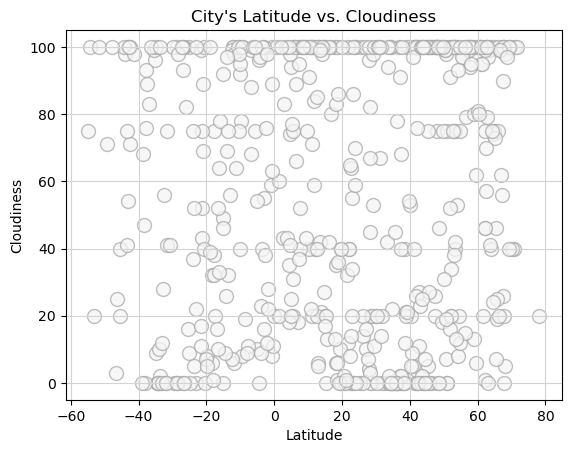

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_DF["Lat"], city_data_DF["Cloudiness"], marker="o", facecolors="whitesmoke", edgecolors="darkgrey", s=100, alpha=0.75)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.title("City's Latitude vs. Cloudiness")

plt.grid (which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

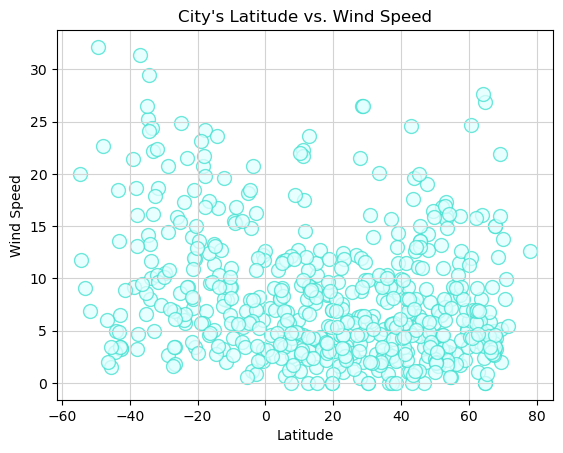

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_DF["Lat"], city_data_DF["Wind Speed"], marker="o", facecolors="lightcyan", edgecolors="turquoise", s=100, alpha=0.75)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.title("City's Latitude vs. Wind Speed")

plt.grid (which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# TESTING IF PROBLEM IS WITH LINREGRESS NOT FINDING SLOPE
x_values = [8, 9, 7]
y_values = [2,12,5]

print(linregress(x_values, y_values))

LinregressResult(slope=3.4999999999999996, intercept=-21.666666666666664, rvalue=0.6820482925847123, pvalue=0.522178756190858, stderr=3.7527767497325684, intercept_stderr=30.1781746005656)


In [59]:
# Define a function to create Linear Regression plots
###video 3?

def LRPfunction(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values, facecolors=facecolors, edgecolors=edgecolors)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_DF.loc[(city_data_DF["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ascension,30.2169,-90.9001,69.01,96,100,0.00,US,1698671457
1,nyrob,60.7330,56.7202,24.37,95,100,4.65,RU,1698671457
2,sitka,57.0531,-135.3300,48.09,71,100,11.50,US,1698671457
4,gilgit,35.9221,74.3087,62.29,36,0,2.86,PK,1698671458
6,qaqortoq,60.7167,-46.0333,42.66,60,100,24.65,GL,1698671458


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_DF.loc[(city_data_DF["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mahina,-17.5065,-149.4890,74.97,83,20,6.91,PF,1698671458
5,blackmans bay,-43.0167,147.3167,48.33,84,100,6.46,AU,1698671458
7,waitangi,-43.9535,-176.5597,51.82,89,98,5.01,NZ,1698671459
8,hithadhoo,-0.6000,73.0833,80.78,82,8,12.26,MV,1698671459
10,cururupu,-1.8283,-44.8683,90.07,49,28,8.23,BR,1698671329


###  Temperature vs. Latitude Linear Regression Plot

In [61]:
from scipy import stats

The correlation between both factors is -0.86


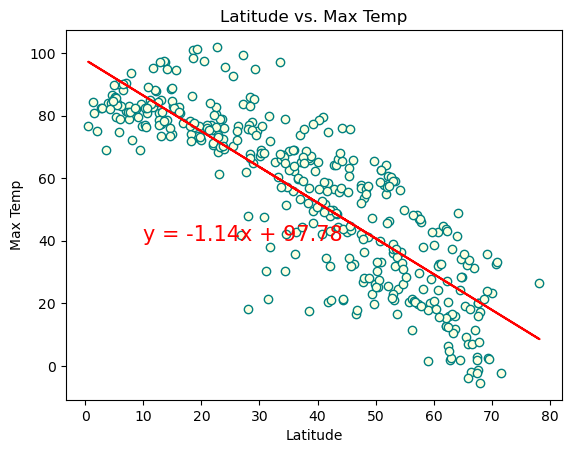

In [63]:
#PROBLEM # Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
facecolors="lightyellow"
edgecolors="teal"

#linregress(x_values, y_values) #RETURNS FINE

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Max Temp in Northern Hemisphere", "Max Temp",(10,40)) #UnboundLocalError: cannot access local variable 'slope' where it is not associated with a value

The correlation between both factors is 0.8


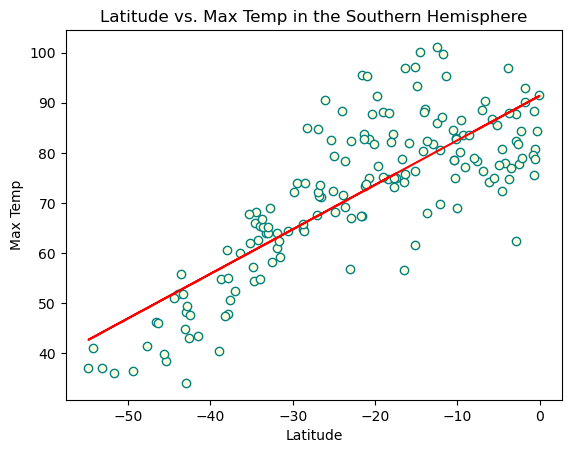

In [64]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
facecolors="lightyellow"
edgecolors="teal"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Max Temp in the Southern Hemisphere", "Max Temp",(10,40)) #UnboundLocalError: cannot access local variable 'slope' where it is not associated with a value

**Discussion about the linear relationship:** For both hemispheres, there is a strong correlation between an increase in latitude with an increase in the maximum temperature of the sample cities.

### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is 0.2


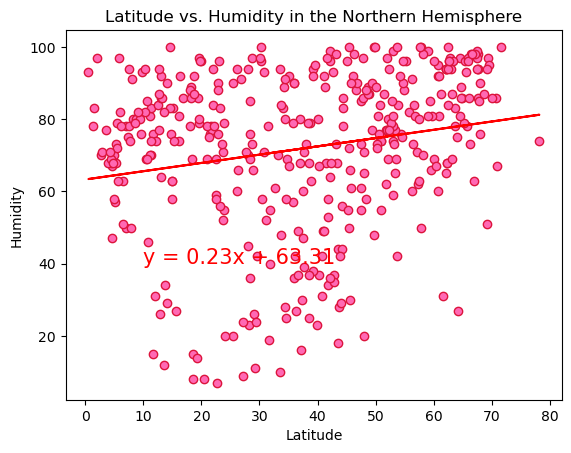

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
facecolors="hotpink"
edgecolors="crimson"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Humidity in the Northern Hemisphere", "Humidity",(10,40))

The correlation between both factors is -0.04


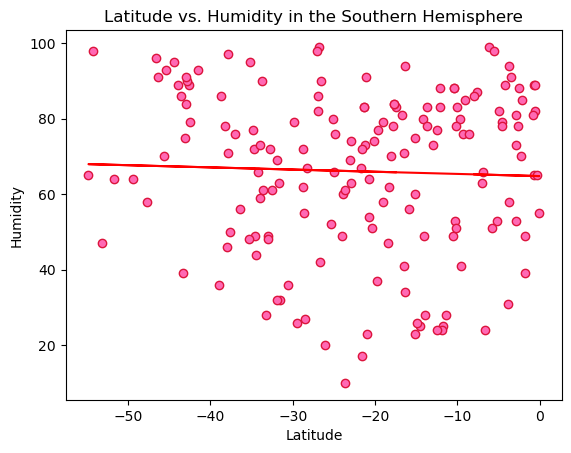

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
facecolors="hotpink"
edgecolors="crimson"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Humidity in the Southern Hemisphere", "Humidity",(10,40))

**Discussion about the linear relationship:** In both hemispheres, there is a very weak to no correlation (0.2 & -0.04) between changes in latitude & changes in the humidity, as shown by the nearly horizontal line of regression/trendline.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is 0.09


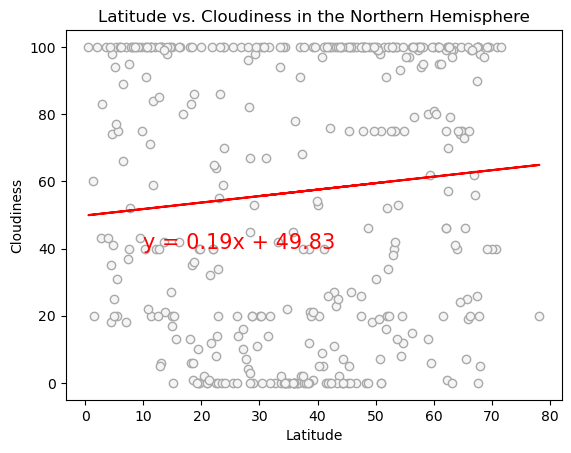

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
facecolors="whitesmoke"
edgecolors="darkgrey"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Cloudiness in the Northern Hemisphere", "Cloudiness",(10,40))

The correlation between both factors is -0.02


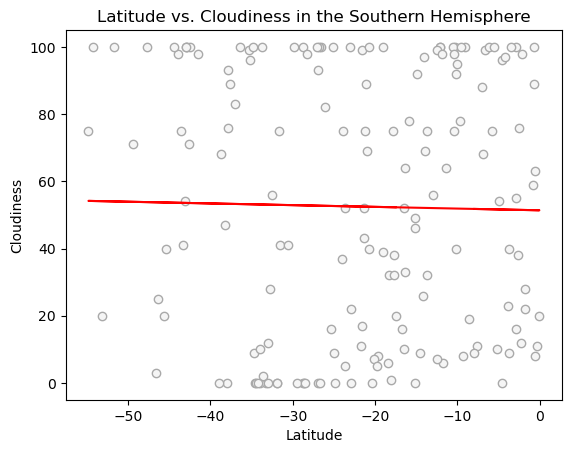

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
facecolors="whitesmoke"
edgecolors="darkgrey"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Cloudiness in the Southern Hemisphere", "Cloudiness",(10,40))

**Discussion about the linear relationship:** In both hemispheres, there is a very weak to no correlation (0.2 & -0.04) between changes in latitude & cloudiness, though each line of regression/trendline is slightly more sloped than between humidity & latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is 0.03


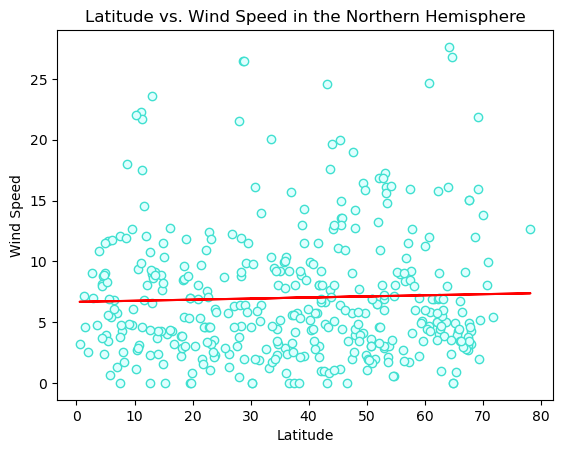

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
facecolors="lightcyan"
edgecolors="turquoise"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

LRPfunction(x_values, y_values,"Latitude vs. Wind Speed in the Northern Hemisphere", "Wind Speed",(10,40))

The correlation between both factors is -0.17


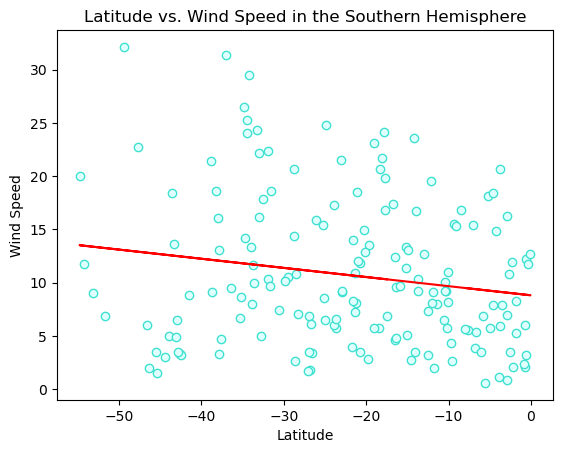

The correlation between both factors is -0.17


In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
facecolors="lightcyan"
edgecolors="turquoise"

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
    
LRPfunction(x_values, y_values,"Latitude vs. Wind Speed in the Southern Hemisphere", "Wind Speed",(10,40))

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

**Discussion about the linear relationship:** In both hemispheres, there is a very weak to no correlation (0.2 & -0.04) between changes in latitude & wind speed. 

In [ ]:
Lat vs Max temp NH 0.86
Lat vs Max temp SH 0.8
vs Humidity NH 0.2
vs Humidity SH -0.04
vs Cloudiness NH 0.09
vs Cloudiness SH -0.02
vs Wind Speed NH 0.03
vs Wind Speed SH -0.17